## Fashion MNIST (MLP)

## Imports

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tf_layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets.fashion_mnist import load_data as load_data_Fashion_MNIST

import numpynet
import numpynet.layers
import numpynet.activations
import numpynet.losses
import numpynet.network
import numpynet.callbacks
import demo_utils

## Loading data

In [3]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = load_data_Fashion_MNIST()

fmnist = {
    'train': {
        'x': x_train_fmnist[..., np.newaxis] / 255.0 - 0.5,
        'y': y_train_fmnist,
        'y_hot': np.array(tf.one_hot(y_train_fmnist, 10))
    },
    'test': {
        'x': x_test_fmnist[..., np.newaxis] / 255.0 - 0.5,
        'y': y_test_fmnist,
        'y_hot': np.array(tf.one_hot(y_test_fmnist, 10))
    }
}

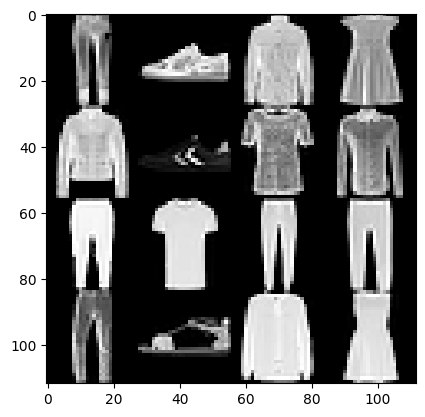

In [4]:
demo_utils.plot_random_images(fmnist['train']['x'])

## Tensorflow

### Creating and fitting

In [11]:
tf_model_fmnist = keras.models.Sequential([
    tf_layers.InputLayer((28, 28, 1)),
    tf_layers.Flatten(),
    tf_layers.Dense(256, activation='tanh'),
    tf_layers.Dropout(0.5),
    tf_layers.Dense(128, activation='sigmoid'),
    tf_layers.Dropout(0.5),
    tf_layers.Dense(10 , activation = None)
])

In [12]:
tf_model_fmnist.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [13]:
tf_model_fmnist.compile(optimizer=SGD(learning_rate=0.001),
              loss='mse',
              metrics=['categorical_accuracy'],
)

In [14]:
last_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_fmnist_mlp_last')
best_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_fmnist_mlp_best', save_best_only=True)

tf_fmnist_history = tf_model_fmnist.fit(
    fmnist['train']['x'],
    fmnist['train']['y_hot'],
    validation_data=(fmnist['test']['x'], fmnist['test']['y_hot']),
    epochs=10,
    batch_size=1,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback]
)

Epoch 1/10
59979/60000 [============================>.] - ETA: 0s - loss: 0.1288 - categorical_accuracy: 0.2613INFO:tensorflow:Assets written to: saved_models\tf_fmnist_dense_last\assets
INFO:tensorflow:Assets written to: saved_models\tf_fmnist_dense_best\assets
60000/60000 [==============================] - 311s 5ms/step - loss: 0.1288 - categorical_accuracy: 0.2613 - val_loss: 0.0715 - val_categorical_accuracy: 0.6378
Epoch 2/10
59977/60000 [============================>.] - ETA: 0s - loss: 0.0779 - categorical_accuracy: 0.4271INFO:tensorflow:Assets written to: saved_models\tf_fmnist_dense_last\assets
INFO:tensorflow:Assets written to: saved_models\tf_fmnist_dense_best\assets
60000/60000 [==============================] - 305s 5ms/step - loss: 0.0779 - categorical_accuracy: 0.4271 - val_loss: 0.0650 - val_categorical_accuracy: 0.6578
Epoch 3/10
59994/60000 [============================>.] - ETA: 0s - loss: 0.0711 - categorical_accuracy: 0.5100INFO:tensorflow:Assets written to: saved_

### Results

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1000
           1       0.98      0.91      0.94      1000
           2       0.53      0.62      0.57      1000
           3       0.71      0.87      0.78      1000
           4       0.48      0.63      0.54      1000
           5       0.74      0.72      0.73      1000
           6       0.31      0.01      0.02      1000
           7       0.78      0.83      0.80      1000
           8       0.91      0.90      0.90      1000
           9       0.82      0.94      0.88      1000

    accuracy                           0.72     10000
   macro avg       0.69      0.72      0.69     10000
weighted avg       0.69      0.72      0.69     10000



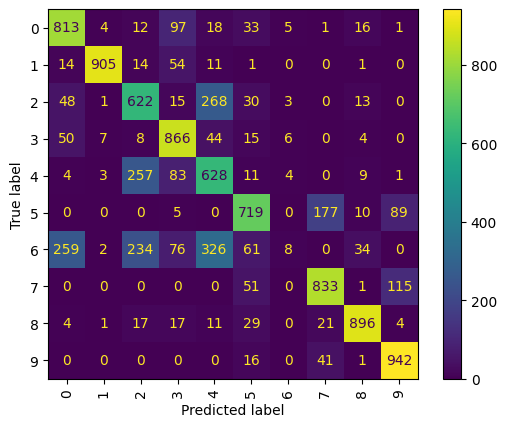

In [15]:
demo_utils.show_final_results(tf_model_fmnist, fmnist['test'])

## Own library

### Creating and fitting

In [16]:
layers = [
    numpynet.layers.InputLayer((28, 28, 1)),
    numpynet.layers.FlattenLayer(),
    
    numpynet.layers.DenseLayer(256),
    numpynet.layers.BiasLayer(),
    numpynet.layers.ActivationLayer('tanh'),
    
    numpynet.layers.DropoutLayer(0.5),
    numpynet.layers.DenseLayer(128),
    numpynet.layers.BiasLayer(),
    numpynet.layers.ActivationLayer('sigmoid'),
    
    numpynet.layers.DropoutLayer(0.5),
    numpynet.layers.DenseLayer(10),
    numpynet.layers.BiasLayer(),
]

own_model_fmnist = numpynet.network.Sequential(layers)

In [17]:
own_model_fmnist.compile(
    loss='mse',
    metrics=['categorical_accuracy']
)

In [18]:
own_model_fmnist.summary()

NO   | NAME                 | PARAMS     | INPUT           | OUTPUT         
0    | InputLayer           | 0          | (28, 28, 1)     | (28, 28, 1)    
1    | FlattenLayer         | 0          | (28, 28, 1)     | (784,)         
2    | DenseLayer           | 200704     | (784,)          | (256,)         
3    | BiasLayer            | 256        | (256,)          | (256,)         
4    | ActivationLayer      | 0          | (256,)          | (256,)         
5    | DropoutLayer         | 0          | (256,)          | (256,)         
6    | DenseLayer           | 32768      | (256,)          | (128,)         
7    | BiasLayer            | 128        | (128,)          | (128,)         
8    | ActivationLayer      | 0          | (128,)          | (128,)         
9    | DropoutLayer         | 0          | (128,)          | (128,)         
10   | DenseLayer           | 1280       | (128,)          | (10,)          
11   | BiasLayer            | 10         | (10,)           | (10,)          

In [19]:
last_checkpoint_callback = numpynet.callbacks.ModelCheckpoint('saved_models/own_fmnist_mlp_last.dat', verbose=True)
best_checkpoint_callback = numpynet.callbacks.ModelCheckpoint('saved_models/own_fmnist_mlp_best.dat', save_best_only=True, monitor='val_loss', mode='min', verbose=True)
stopping_callback = numpynet.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

own_fmnist_history = own_model_fmnist.fit(
    fmnist['train']['x'],
    fmnist['train']['y_hot'],
    validation_data=(fmnist['test']['x'], fmnist['test']['y_hot']),
    learning_rate=0.001,
    epochs=10,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback, stopping_callback],
)

Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:08<00:00, 1168.28it/s, val_loss=0.0721, val_categorical_accuracy=0.6105]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:08<00:00, 1166.45it/s, val_loss=0.0660, val_categorical_accuracy=0.6754]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:06<00:00, 1478.14it/s, val_loss=0.0613, val_categorical_accuracy=0.7087]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:06<00:00, 1475.76it/s, val_loss=0.0584, val_categorical_accuracy=0.7197]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:06<00:00, 1477.44it/s, val_loss=0.0557, val_categorical_accuracy=0.7328]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:06<00:00, 1479.77it/s, val_loss=0.0533, val_categorical_accuracy=0.7329]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:06<00:00, 1480.72it/s, val_loss=0.0512, val_categorical_accuracy=0.7401]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:07<00:00, 1410.30it/s, val_loss=0.0493, val_categorical_accuracy=0.7464]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:07<00:00, 1412.59it/s, val_loss=0.0473, val_categorical_accuracy=0.7471]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


Validate: 100%|██████████| 10000/10000 [00:07<00:00, 1399.40it/s, val_loss=0.0456, val_categorical_accuracy=0.7518]


Saving model to saved_models/own_fmnist_mlp_last.dat
Saving model to saved_models/own_fmnist_mlp_best.dat


### Results

Predict: 100%|██████████| 10000/10000 [00:01<00:00, 8413.20it/s]


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.99      0.89      0.94      1000
           2       0.65      0.57      0.61      1000
           3       0.71      0.83      0.76      1000
           4       0.56      0.73      0.64      1000
           5       0.85      0.82      0.84      1000
           6       0.35      0.28      0.31      1000
           7       0.84      0.84      0.84      1000
           8       0.93      0.89      0.91      1000
           9       0.87      0.91      0.89      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



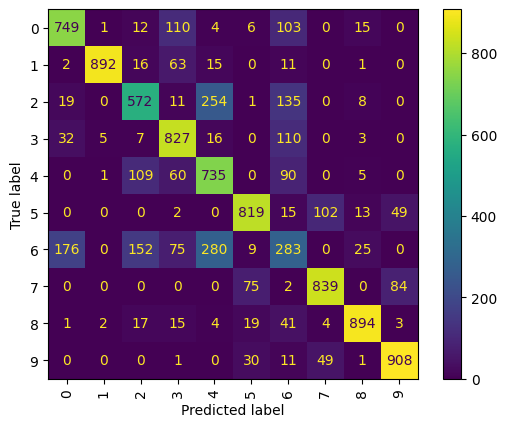

In [20]:
demo_utils.show_final_results(own_model_fmnist, fmnist['test'])

## History Comparison

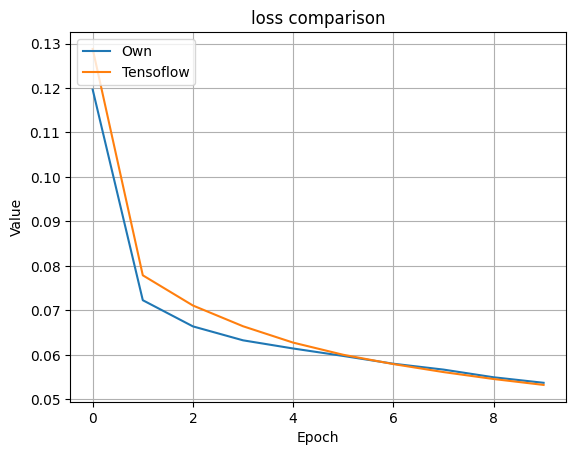

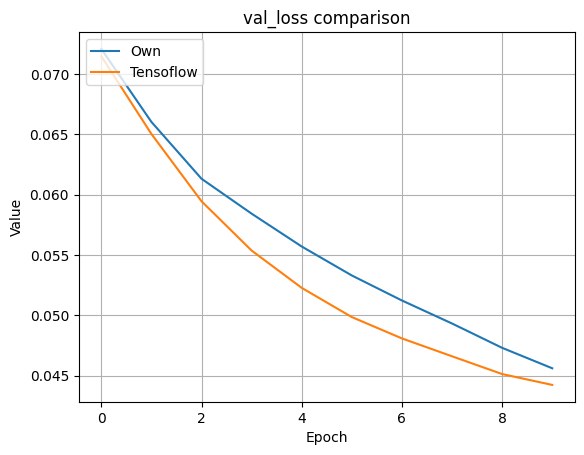

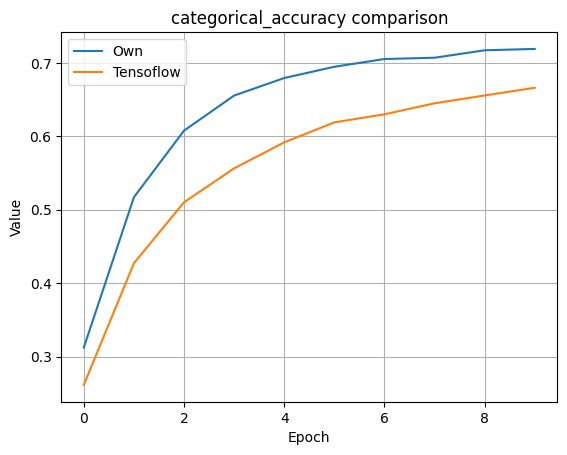

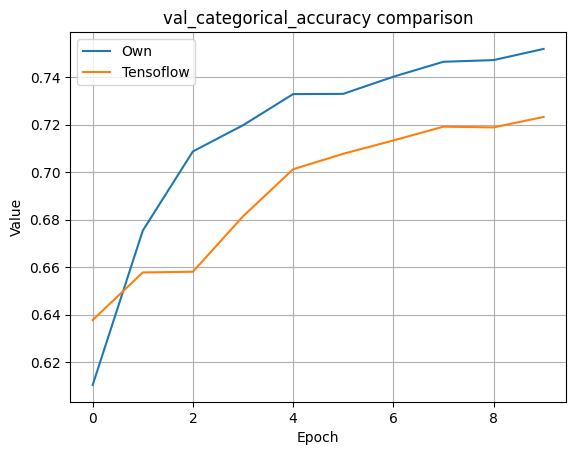

In [21]:

demo_utils.plot_history_comparison(own_fmnist_history, tf_fmnist_history.history)